# LOGISTIC REGRESSION

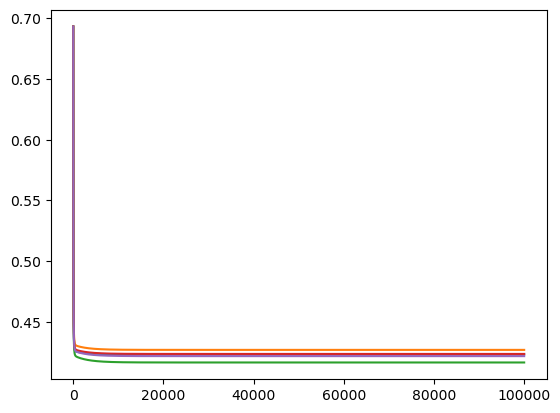

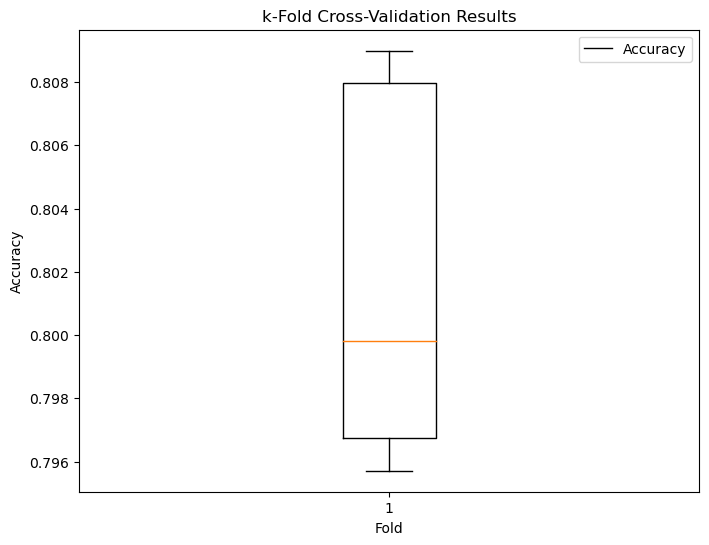

Cross-validation results:
Accuracy before cross-validation: 0.8079673135852911
Accuracy after cross-validation: 0.8018386108273748
Standard deviation: 0.005594714581258058


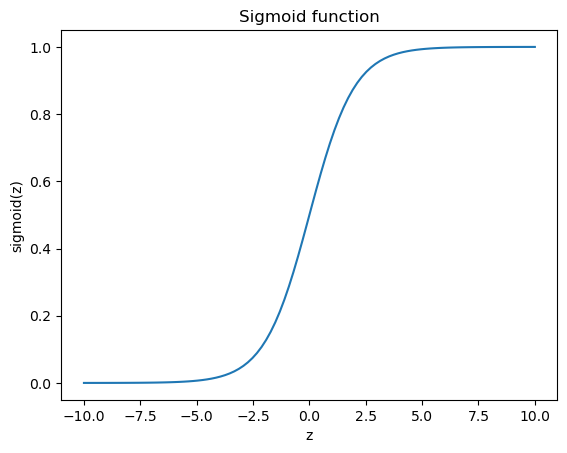

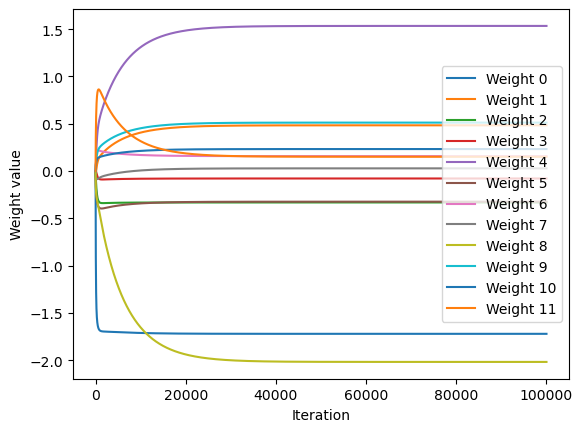

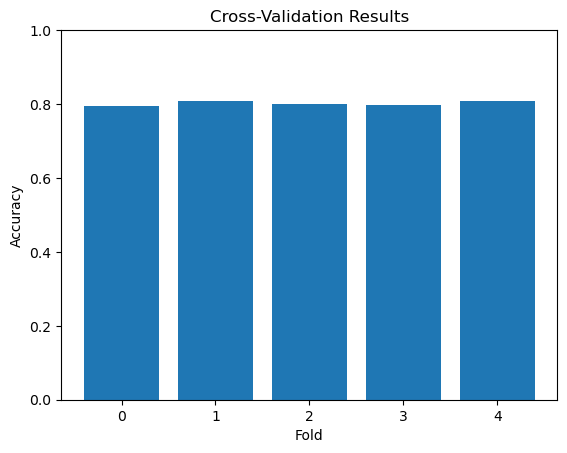

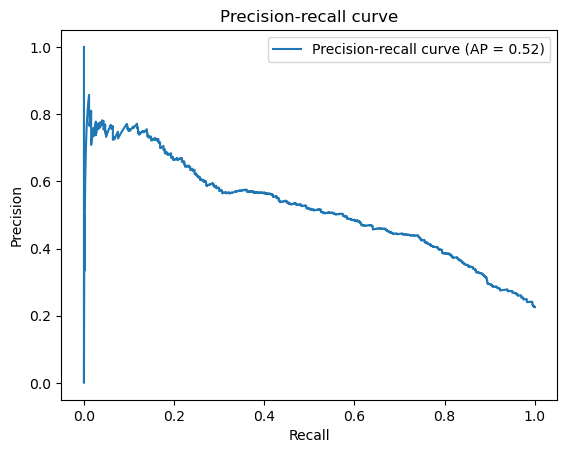

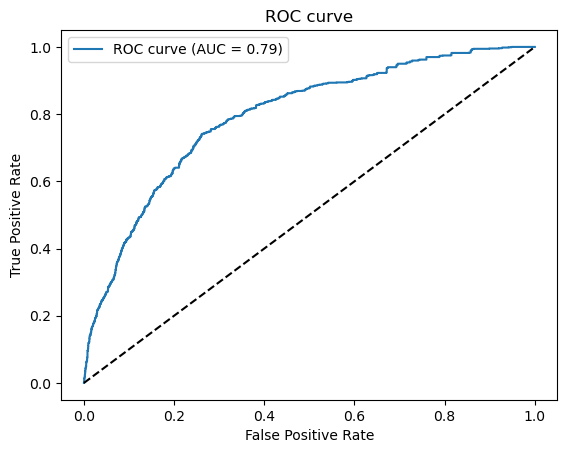

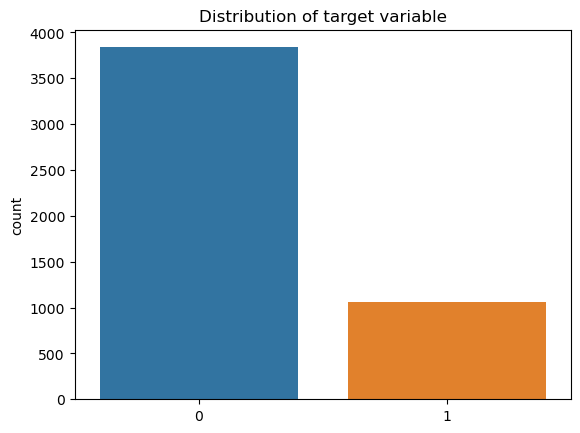

Confusion matrix:

 [[718  36]
 [152  73]]


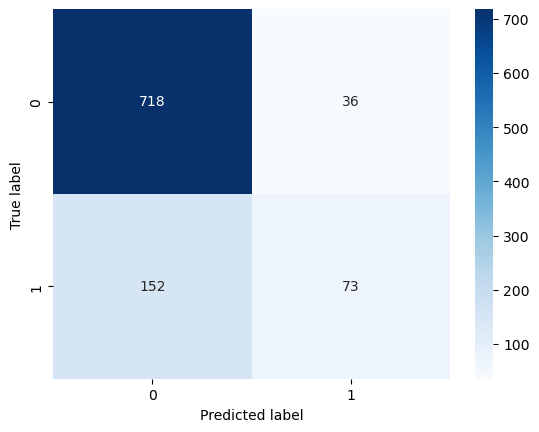

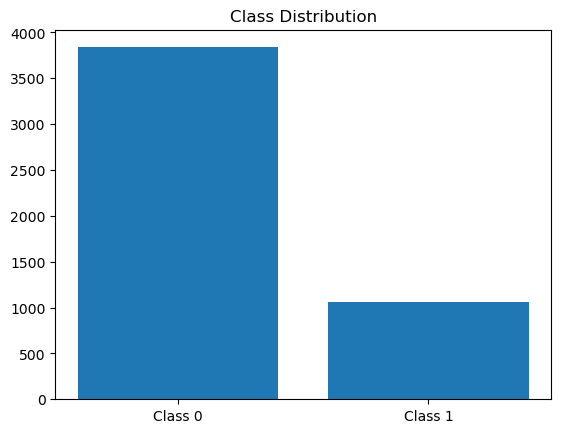

F1 score:
 0.437125748502994


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=';')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Convert target to binary classification problem
y = np.where(y <= 6, 0, 1)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Implement logistic regression from scratch
class LogisticRegression:
    def __init__(self, lr=0.1, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.loss_history = []

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])
        self.weight_history = [self.theta.copy()] 

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            self.weight_history.append(self.theta.copy())  # store updated weights

            loss = self.__loss(h, y)
            self.loss_history.append(loss)

            if self.verbose and i % 10000 == 0:
                print(f"Loss at iteration {i}: {loss}")

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
    def plot_sigmoid(self):
        z = np.linspace(-10, 10, 100)
        s = self.__sigmoid(z)
        plt.plot(z, s)
        plt.xlabel('z')
        plt.ylabel('sigmoid(z)')
        plt.title('Sigmoid function')
        plt.show()
    def plot_loss(self):
        plt.plot(self.loss_history)


# Set the number of folds
k = 5


# Calculate the size of each fold
fold_size = len(X) // k

# Shuffle the data
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Initialize the list of accuracies
accuracies = []

# Loop over the folds
for i in range(k):
    # Get the indices of the current fold
    start = i * fold_size
    end = (i + 1) * fold_size
    indices = range(start, end)

    # Split the data into training and testing sets
    X_test = X[start:end]
    y_test = y[start:end]
    X_train = np.delete(X, indices, axis=0)
    y_train = np.delete(y, indices)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    model = LogisticRegression(lr=0.1, num_iter=100000)
    model.fit(X_train, y_train)
    model.plot_loss()


    # Predict on the test set and evaluate
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

# Calculate the mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
# Plot the accuracies for each fold
plt.figure(figsize=(8, 6))
plt.boxplot(accuracies,whis=3)
plt.title('k-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(["Accuracy"], loc="upper right")
plt.show()


print("Cross-validation results:")
print(f"Accuracy before cross-validation: {np.mean(y_pred == y_test)}")
print(f"Accuracy after cross-validation: {mean_accuracy}")
print(f"Standard deviation: {std_accuracy}")



model = LogisticRegression()
model.plot_sigmoid()

# Train the model
model = LogisticRegression(lr=0.1, num_iter=100000)
model.fit(X_train, y_train)
final_loss = model.loss_history[-1]
final_loss

# Plot weight updates
weight_history = np.array(model.weight_history)
fig, ax = plt.subplots()
for i in range(weight_history.shape[1]):
    ax.plot(weight_history[:, i], label=f"Weight {i}")
ax.set_xlabel("Iteration")
ax.set_ylabel("Weight value")
ax.legend()
plt.show()

import matplotlib.pyplot as plt

# Plot the accuracies for each fold
plt.bar(range(k), accuracies)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.title("Cross-Validation Results")
plt.show()


from sklearn.metrics import precision_recall_curve, average_precision_score

model = LogisticRegression(lr=0.1, num_iter=100000)
model.fit(X, y)
y_pred_prob = model.predict_prob(X)

precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
ap = average_precision_score(y, y_pred_prob)

plt.plot(recall, precision, label="Precision-recall curve (AP = {:.2f})".format(ap))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall curve")
plt.legend()
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

model = LogisticRegression(lr=0.1, num_iter=100000)
model.fit(X, y)
y_pred_prob = model.predict_prob(X)

fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = roc_auc_score(y, y_pred_prob)

plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

#Plot the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Distribution of target variable")
plt.show()


def confusion_matrix(y_true, y_pred):
    """
    Computes the confusion matrix for binary classification.
    """
    tp = np.sum((y_test == 1) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])
def f1_score(y_true, y_pred):
    """
    Computes the F1 score for binary classification.
    """
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n\n", cm)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

plt.bar([0, 1], [len(y[y==0]), len(y[y==1])])
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.title('Class Distribution')
plt.show()



# Compute F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:\n", f1)

# 

# 

# 